In [23]:
#Copyright 2018, Seokjun Bu, Softcomputing LAB all rights reserved.
from keras import backend as K
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Convolution3D, MaxPooling3D, AveragePooling3D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.layers import LSTM, TimeDistributed, CuDNNLSTM
from keras.layers import Input
from keras.models import Model
from keras.models import load_model
from keras.metrics import top_k_categorical_accuracy
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import itertools
from keras.layers.convolutional import Conv2D, MaxPooling2D
%matplotlib inline

In [24]:
# Load Dataset
#ped = 2
#window_size = 10



X_train = np.load('test/X_train.npy')
X_test = np.load('test/X_test.npy')
Y_train = np_utils.to_categorical(np.load('test/Y_train.npy'))
Y_test = np_utils.to_categorical(np.load('test/Y_test.npy'))

print(Y_test.shape, X_test.shape)
print(Y_train.shape, X_train.shape)

(1000, 3, 2) (1000, 64, 64, 3)
(3000, 3, 2) (3000, 64, 64, 3)


In [25]:
Y_test = Y_test[:, :, 1]

In [26]:
Y_train = Y_train[:, :, 1]

model 1

In [30]:
model_input = Input(X_train.shape[1:])
H = Reshape((X_train.shape[1], X_train.shape[2], X_train.shape[3]))(model_input)
model_hidden = Conv2D(16, kernel_size=(2, 2), padding='same', activation='relu')(H) 
model_hidden = MaxPooling2D((2, 2))(model_hidden)

model_hidden = Flatten()(model_hidden)
model_hidden = Dense(512, activation='tanh')(model_hidden)
model_output = Dense(Y_train.shape[1], activation='softmax')(model_hidden)
model_my = Model(model_input, model_output)
model_my.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               8389120   
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 1539      
Total para

In [31]:
model_my.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [32]:
model_history = model_my.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=100, verbose=2, shuffle=True) 

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
 - 16s - loss: 2.7585 - acc: 0.4693 - val_loss: 2.2720 - val_acc: 0.5170
Epoch 2/10
 - 15s - loss: 2.4213 - acc: 0.4990 - val_loss: 2.2792 - val_acc: 0.5170
Epoch 3/10
 - 15s - loss: 2.4206 - acc: 0.4907 - val_loss: 2.2772 - val_acc: 0.5170
Epoch 4/10
 - 15s - loss: 2.4211 - acc: 0.4943 - val_loss: 2.2865 - val_acc: 0.3980
Epoch 5/10
 - 15s - loss: 2.4136 - acc: 0.5013 - val_loss: 2.2878 - val_acc: 0.4340
Epoch 6/10
 - 15s - loss: 2.3928 - acc: 0.5187 - val_loss: 2.3601 - val_acc: 0.5170
Epoch 7/10
 - 15s - loss: 2.3789 - acc: 0.5533 - val_loss: 2.1871 - val_acc: 0.6290
Epoch 8/10
 - 16s - loss: 2.3156 - acc: 0.6310 - val_loss: 2.1853 - val_acc: 0.6080
Epoch 9/10
 - 15s - loss: 2.2638 - acc: 0.6687 - val_loss: 2.1700 - val_acc: 0.6280
Epoch 10/10
 - 15s - loss: 2.2180 - acc: 0.6983 - val_loss: 2.1180 - val_acc: 0.6780


model 2

In [33]:
# Build Model
model_input = Input(X_train.shape[1:])
model_hidden = Conv2D(16, kernel_size=(2, 2), padding='same', activation='relu')(model_input)
model_hidden = MaxPooling2D((2, 2))(model_hidden)
model_hidden = Conv2D(32, kernel_size=(2, 2), padding='same', activation='relu')(model_hidden)
model_hidden = MaxPooling2D((2, 2))(model_hidden)
model_hidden = Flatten()(model_hidden)
model_hidden = Dense(1024, activation='relu')(model_hidden)
model_hidden = Dense(256, activation='relu')(model_hidden)
model_output = Dense(Y_train.shape[1], activation='softmax')(model_hidden)
model_my2 = Model(model_input, model_output)
model_my2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              8389632   
__________

In [34]:
model_my2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_history2 = model_my2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=100, verbose=2, shuffle=True) 

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
 - 23s - loss: 1.0304 - acc: 0.4803 - val_loss: 0.9304 - val_acc: 0.5230
Epoch 2/10
 - 21s - loss: 0.8930 - acc: 0.5763 - val_loss: 0.8153 - val_acc: 0.6450
Epoch 3/10
 - 21s - loss: 0.8080 - acc: 0.6363 - val_loss: 0.7930 - val_acc: 0.6660
Epoch 4/10
 - 21s - loss: 0.7364 - acc: 0.6757 - val_loss: 0.7715 - val_acc: 0.6470
Epoch 5/10
 - 21s - loss: 0.6714 - acc: 0.7207 - val_loss: 0.7313 - val_acc: 0.7000
Epoch 6/10
 - 21s - loss: 0.5863 - acc: 0.7550 - val_loss: 0.7242 - val_acc: 0.7030
Epoch 7/10
 - 21s - loss: 0.5156 - acc: 0.7917 - val_loss: 0.6849 - val_acc: 0.7340
Epoch 8/10
 - 22s - loss: 0.4827 - acc: 0.8150 - val_loss: 0.6979 - val_acc: 0.7300
Epoch 9/10
 - 21s - loss: 0.3872 - acc: 0.8557 - val_loss: 0.6762 - val_acc: 0.7580
Epoch 10/10
 - 21s - loss: 0.3195 - acc: 0.8823 - val_loss: 0.7074 - val_acc: 0.7600


confusion matrix and accuracy

In [35]:
def plot_confusion_matrix(model_input, feature, label, class_info):
    pred = model_input.predict(feature)
    cnf_matrix = confusion_matrix(np.argmax(label, axis=1), np.argmax(pred, axis=1))
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    tick_marks = np.arange(len(class_info))
    plt.xticks(tick_marks, class_info, rotation=45), plt.yticks(tick_marks, class_info)
    thresh = cnf_matrix.max()/2.
    for i in range(cnf_matrix.shape[0]):
        for j in range(cnf_matrix.shape[1]):
            plt.text(j, i, cnf_matrix[i, j], horizontalalignment='center', color='white' if cnf_matrix[i,j]>thresh else 'black')
    plt.ylabel('Actual'), plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

In [36]:
models = [model_my, model_my2]

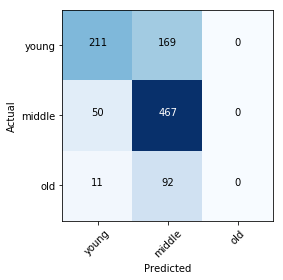

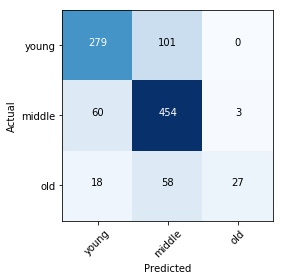

In [37]:
for c in models:
    plot_confusion_matrix(c, X_test, Y_test, class_info=["young", "middle", "old"])

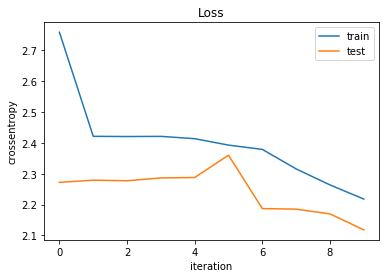

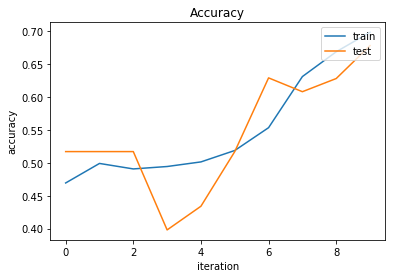

In [38]:
# Validation: Curve Plotting
# Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss')
plt.xlabel('iteration'), plt.ylabel('crossentropy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('iteration'), plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

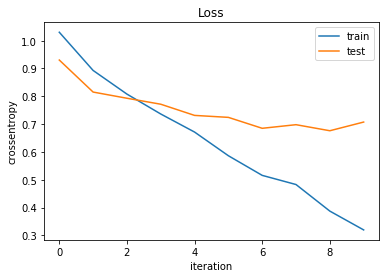

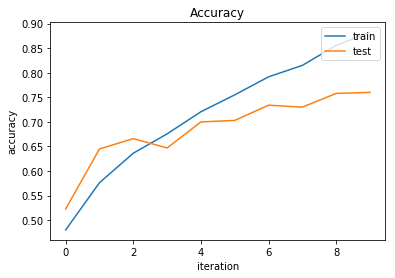

In [39]:
# Validation: Curve Plotting
# Loss
plt.plot(model_history2.history['loss'])
plt.plot(model_history2.history['val_loss'])
plt.title('Loss')
plt.xlabel('iteration'), plt.ylabel('crossentropy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy
plt.plot(model_history2.history['acc'])
plt.plot(model_history2.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('iteration'), plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()